In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the dataset from the file Ecommerce.csv

```
This dataset includes the following data for 200 online customers:

- Email
- Adress
- Avatar
- Avg Session Length (everage time they spent on usage)
- Time on App (time they spent using the application)
- Time on Website (time they spent using the website)
- Length of Membership (for how long they have been a user)
- Yearly Amount Spent (how much money they spend yearly)

Yout goal will be to estimate the value of the Yearly Amount Spent using the feature(s) of the users
```

In [2]:
df = pd.read_csv('Ecommerce.csv')
df.head()

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### Get rid of non-numerical columns of the dataset

In [3]:
print('Delet non numerical columns')
col_list = df.columns.tolist()
for i in range(len(col_list)):
    if str(df[col_list[i]].dtypes) != 'float64':
        df=df.drop(columns=[col_list[i]])
df.head()

Delet non numerical columns


,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


### Use Yearly Amount Spent as your target variable. Plot the relationship of each of the numerical features with the target variable

['Avg Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']
Which is your target variable : 123
Your target variable is incorrect PLEASE copy target variable name of dataset
Which is your target variable : Yearly Amount Spent
Your target variable is incorrect PLEASE copy target variable name of dataset


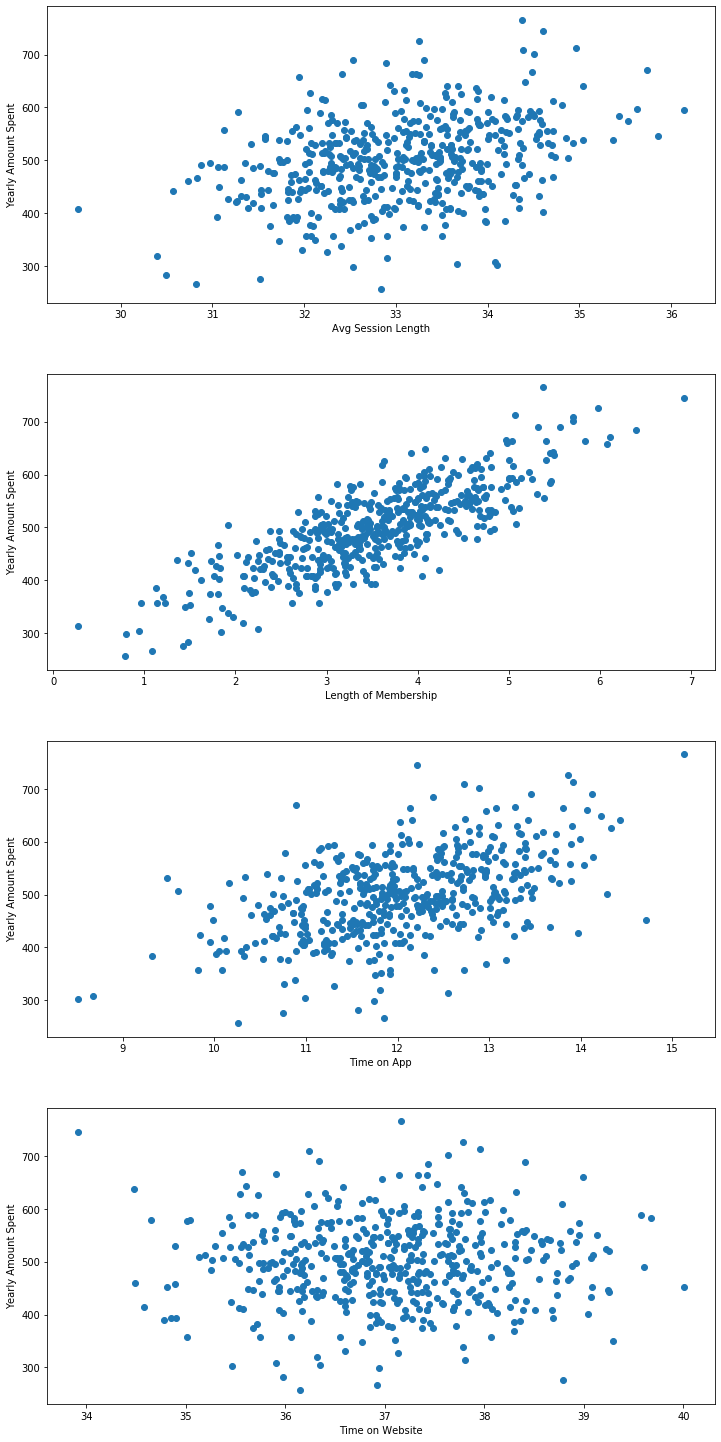

In [4]:
col_name = df.columns.tolist()
flag = True
while flag:
    leabel = str(input('Which is your target variable : '))
    for i in range(len(col_name)):
        if leabel == col_name[i]:
            flag = False
            break
    print("Your target variable is incorrect PLEASE copy target variable name of dataset")
fig, axs = plt.subplots(len(df.columns.difference([leabel])),1)
fig.set_figwidth(10)
fig.set_figheight(20)
fig.tight_layout(h_pad = 5)

coloms = df.columns.difference([leabel]).tolist()

for i in range(len(coloms)):
    axs[i].scatter(df[coloms[i]], df[leabel])
    axs[i].set_xlabel(coloms[i])
    axs[i].set_ylabel(leabel)



### Leave only one feature that has a linear relationship with the target variable.

In [5]:
flag = True
while flag:
    print('Input one feature variable')
    feature = str(input('Which is your feature variable : '))
    for i in range(len(col_name)):
        if feature == col_name[i] and feature!=leabel:
            flag = False
            break
    print("Your feature variable is incorrect PLEASE copy feature variable name of dataset")
ln_df = df[[feature, leabel]]
ln_df

Input one feature variable
Which is your feature variable : Length of Membership123
Your feature variable is incorrect PLEASE copy feature variable name of dataset
Input one feature variable
Which is your feature variable : Length of Membership
Your feature variable is incorrect PLEASE copy feature variable name of dataset


,Length of Membership,Yearly Amount Spent
0,4.082621,587.951054
1,2.664034,392.204933
2,4.104543,487.547505
3,3.120179,581.852344
4,4.446308,599.406092
...,...,...
495,3.746573,573.847438
496,3.576526,529.049004
497,4.958264,551.620145
498,2.336485,456.469510


### Divide the dataset into training and test sets with the ratio 80:20.

In [6]:
while True:
    print('Please input test size 0.0 to 1.0')
    test_size = float(input('Test size ='))
    if 0 < test_size < 1:
        break
        
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(ln_df[ln_df.columns.difference([leabel])], 
                                                ln_df[leabel], test_size=0.2, random_state=20)
print('Train lengt =',len(xTrain))
print('Test lengt =',len(xTest))

Please input test size 0.0 to 1.0
Test size =0.2
Train lengt = 400
Test lengt = 100


In [7]:
xTrain.index = [i for i in range(len(xTrain))]
yTrain.index = [i for i in range(len(yTrain))]

xTest.index = [i for i in range(len(xTest))]
yTest.index = [i for i in range(len(yTest))]

### Use the resulting train and test sets with the next 2 functions to fit linear regression and plot the resulting regression line.

The first function is `fit_1d_linear_regression` that takes two vectors $x$ and $y$, and returns a numpy array ($\beta_0, \beta_1)$, where $\beta_0$ is the intercept of the line, and $\beta_1$ is the slope. 

In [10]:
def fit_1d_linear_regression(data_vector, response_vector):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    
    Note: You can avoid the intercept for simplicity 
    or include the intercept for an extra point
    """
    
    if len(data_vector) != len(response_vector):
        print('lengt data_vector and lengt response_vector in not equal')
    x_vector = data_vector.tolist()
    y_vector = response_vector.tolist()
    xy, y, x, xx = 0, 0, 0, 0
    n = len(data_vector)
    for i in range(n):
        xy = xy + x_vector[i]*y_vector[i]
        y = y + y_vector[i]
        x = x + x_vector[i]
        xx = xx + x_vector[i]**2
        
    bet_1 = (xy - (1/n)*y*x)/(xx - (1/n)*x**2)
    bet_0 = (y - bet_1*x)/n
    
    return (bet_0, bet_1)
    
b0, b1 = fit_1d_linear_regression(xTrain[feature], yTrain)    

print('Intercept =',b0)
print('Slope =', b1)

Intercept = 271.0696303392176
Slope = 64.71480815459044


The second function is `plot_line` function, that takes $\beta_0, \beta_1, x, y$ and plots a scatter plot of the data, and the line $y = \beta_0 + \beta_1 x$. And saves the plot in `YOURNAME.png`

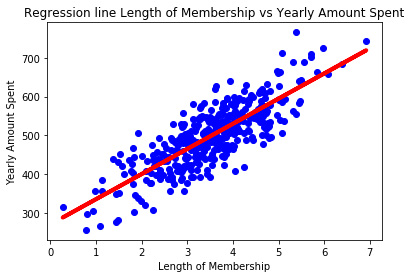

In [20]:
def plot_fitted_line(b0, b1, x, y):
    """
    :param b0: Intersept of line to plot
    Note: avoid this if you don't have an intercept in the previous function
    :param b1: Slope of the line to plot
    :param x: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x coordinates)
    :param y: A pandas series object (i.e. a column of a dataframe),
                        where each element is a label (y coordinates)
    """
    
    if len(x) != len(x):
        print('lengt x and lengt y in not equal')

    x_arr = x.tolist()
    y_arr = y.tolist()
    
    y_prd = []
    for i in range(len(x_arr)):
        y_prd.append(b0 + b1*x[i])
        
    #PLOT graphics
    plt.scatter(x_arr, y_arr, c='b')
    plt.plot(x_arr, y_prd, c='r', lw=4)
    
    plt.xlabel(feature)
    plt.ylabel(leabel)
    plt.title('Regression line %s vs %s' %(feature, leabel))
    
    plt.xticks()
    plt.yticks()
    
    plt.show()  

plot_fitted_line(b0, b1, xTrain[feature], yTrain)

### Plot example

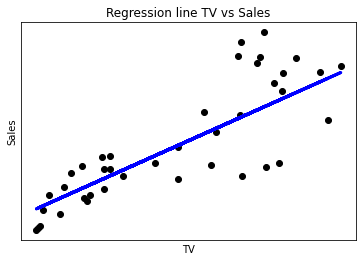

### Now fit the linear regression to the data containing only 1 feature using sklearn and compare the results with your own fit_1d_linear_regression function

In [22]:
from sklearn import linear_model
import numpy as np
rg = linear_model.LinearRegression()
rg.fit(xTrain, yTrain)


intercept, coef = fit_1d_linear_regression(xTrain[feature], yTrain)
print('My intercept = :%.2f' %intercept)
print('Sklearn intercept = :%.2f' %rg.intercept_)

print('My coef = :%.2f' %coef)
print('Sklearn coef = :%.2f' %rg.coef_)

My intercept = :271.07
Sklearn intercept = :271.07
My coef = :64.71
Sklearn coef = :64.71


### Use sklearn.metrics to calculate Mean absolute error, Mean squared error, Root mean squared error and R-squared for the results of your own function vs the sklearn regression results. Try to interprete your results.

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_test_pred = rg.predict(xTest)
y_test_pred

array([468.39774792, 438.4847672 , 389.23140641, 350.54669021,
       451.23327009, 524.65731371, 450.25535266, 367.77367325,
       577.98462468, 515.23659694, 621.32932959, 507.73064358,
       549.47250848, 464.93974055, 499.97392365, 382.10582051,
       348.75871282, 515.8095828 , 529.99122127, 427.73163662,
       495.72148594, 485.28537498, 611.12711039, 666.81355694,
       474.24351364, 432.50354387, 538.05603093, 412.80361455,
       576.27145982, 492.05053651, 609.31372294, 406.63172988,
       563.2001981 , 468.22592214, 505.36085601, 480.16148276,
       468.49593514, 542.43982966, 536.69435624, 542.76498438,
       501.53299343, 585.12039572, 528.79451029, 534.99655026,
       481.9177805 , 474.02385743, 488.73215343, 555.59811464,
       442.70354623, 498.02236407, 540.16769385, 493.86972021,
       431.73111593, 597.87471806, 620.87947286, 542.58801215,
       448.074957  , 505.36018301, 581.3326287 , 522.99735565,
       507.23248394, 478.05342561, 537.25626977, 460.29

In [24]:
np.array(yTest)

array([471.60288439, 420.73767324, 424.18549429, 357.85798361,
       407.54216801, 573.41586733, 510.66179222, 376.33690076,
       554.72208383, 557.60826205, 627.60331871, 490.6004425 ,
       535.32161009, 520.89879445, 461.79095906, 373.8857237 ,
       368.65478495, 494.55186109, 583.07963566, 407.70454755,
       447.68790654, 538.94197453, 591.43773557, 669.9871405 ,
       469.38314617, 470.4527333 , 611.0000251 , 424.2028271 ,
       576.8025474 , 483.15972078, 604.84131882, 408.95833594,
       479.73193765, 550.81336773, 485.92313052, 557.52927361,
       436.28349815, 514.08895775, 487.54750487, 537.91575292,
       474.53232944, 528.93361857, 523.63393514, 442.06441376,
       578.24160506, 457.84769594, 479.61481167, 533.51493526,
       426.77521599, 483.79652206, 565.9943634 , 501.10024523,
       492.60601272, 616.66028602, 663.07481761, 561.87465767,
       497.77864222, 430.58888256, 640.5840619 , 502.4097853 ,
       521.88357317, 416.35835358, 563.67287336, 431.61

In [25]:
print('Mean absolute error = %.3f' % mean_absolute_error(yTest, y_test_pred))
print('Mean squared error = %.3f' % mean_squared_error(yTest, y_test_pred))
print('Root mean squared error = %.3f' % np.sqrt(mean_squared_error(yTest, y_test_pred)))
print('R-squared = %.3f' % r2_score(yTest, y_test_pred))

Mean absolute error = 35.701
Mean squared error = 1991.157
Root mean squared error = 44.622
R-squared = 0.636


### Fit linear regression to the data containing all numerical features using sklearn and use the same metrics to evaluate how good the model is.

In [28]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(df[df.columns.difference([leabel])], 
                                                df[leabel], test_size=0.2, random_state=20)

In [29]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [30]:
regr = linear_model.LinearRegression()
regr.fit(xTrain, yTrain)
regr.coef_, regr.intercept_

(array([26.01617112, 61.75126784, 38.36213802,  0.78968829]),
 -1070.3683848678502)

In [31]:
y_pred_test = regr.predict(xTest)

print('Mean absolute error: %.2f'
      % mean_absolute_error(yTest, y_pred_test))

print('Mean squared error: %.2f'
      % mean_squared_error(yTest, y_pred_test))

print('Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(yTest, y_pred_test)))

print('R-squared: %.2f'
      % r2_score(yTest, y_pred_test))

Mean absolute error: 8.32
Mean squared error: 110.24
Root mean squared error: 10.50
R-squared: 0.98
